<a href="https://colab.research.google.com/github/Marcecr/Entrega_11/blob/main/TP12/Honey_Production_Desafio12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

abeja-miel-tarro_1308-33211.avif


# ANALISIS DE DATOS EXPLORATORIO DE LA PRODUCCION DE MIEL ENTRE 1998-2016 EN EEUU **texto en negrita**
Resumen texto en negrita Las abejas son insectos de gran importantes en el planeta, dedibo a que ellas son responsbles de polinizar diferentes plantas importantes para la alimentacion del ser humano. Ellas se alimentan del polen y de nectar de las plantas , estos dos productos gozan de diferentes propiedad como lo son antioxidantes , antiflamatorio y antibioticos, por esta razon la miel ha sido cosechada, almacenada y comercializada desde los incionos de la humanidad hace mas de 6000 años. Esta base datos(Dataset), corresponde a la producion, demanda y oferta de miel de la abeja Apis mellifera, de distintos estados de EEUU. La informacion fue recolectada por la empresa Statistal(https://www.statista.com/statistics/593656/us-honey-production-volume/ ) y se encuentra en un archivo CSV(US_honey_dataset_updated) con 785 y 8 columnas.

Objetivo Visualizar cómo ha cambiado la producción de miel a lo largo de los años (1998-2016) en Estados Unidos.

Hipotesis: H0: No es Alabama el estado que mas produjo miel. HA: Es Alabama el estado que mas produjo miel. De acuerdo con el analisis DCA es Norte de Dakota

H0:No fue el año 2008 fue el año de mas produccion de miel de todos los estados evaluados. HA:El año 2008 fue el año de mas produccion de miel de todos los estados evaluados.

Fue 1998

Preguntas :

1.¿Cómo ha cambiado el rendimiento de la producción de miel de 1998 a 2016? A lo largo del tiempo, 2.¿cuáles han sido las principales tendencias de producción en los distintos estados? 3.¿Existen patrones que puedan observarse entre la producción total de miel y el valor de la producción cada año? 4.¿Cómo ha cambiado cada año el valor de la producción, estara vinculado a la demanda?

Cada registro contiene 9 caracteristicas. Las columnas son: 0 Unname 1 estado = state (categorica)
2 numero_colonias = numcol (numerica)
3 Producion_por_colonia = yieldpercol(numerica) 4 production = totalprod (numerica)
5 existencia = stocks (numerica)
6 promedio_precio = priceperlb (numerica)
7 value_of_production = prodvalue (numerica) 8 año = year (numerica)

In [2]:
## Cargamos las librerias pandas,numpy,matplotlib, seaborn para realizar visualizacion de los datos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits import mplot3d
import datetime as dt
import plotly.offline as py

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DS/honeyproduction1998-2016.csv')

# **Analisis Exploratorio de Datos(EDA)**
En este apartado exploraremos los datos, el nombre de las variables el tamaño de la base de datos,los tipos de variables y el tamaño de las variables.

In [5]:
df.head() # Con esta funcion vemos los primeros 5 registros del dataset

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [6]:
df.tail() # Con esta funcion vemos los primeros 5 ultimos registros del dataset

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
780,Virginia,5000.0,38,190000.0,30000.0,5.85,1112000.0,2016
781,Washington,84000.0,35,2940000.0,412000.0,1.99,5851000.0,2016
782,West Virginia,5000.0,32,160000.0,43000.0,3.92,627000.0,2016
783,Wisconsin,54000.0,62,3348000.0,1205000.0,2.67,8939000.0,2016
784,Wyoming,40000.0,68,2720000.0,190000.0,1.78,4842000.0,2016


In [7]:
df.shape## Exploremos eltamaño del dataset .Se observan 785 observaciones y 8 columnas.

(785, 8)

Luego de mirar las variables y registros,que componen el dataset, comenzaros a resolver las siguintes preguntas.
1. Cuales son las variables del dataset?
2. Cuantas estancias o registros esta compuesto el dataset?
3.Cuantos años componen el dataset?
4. Cual es el año menor y el mayor?
5. Cual es el estado con mayor produccion?
6.Cual es el rendimiento promedio por año?


<Axes: ylabel='year'>

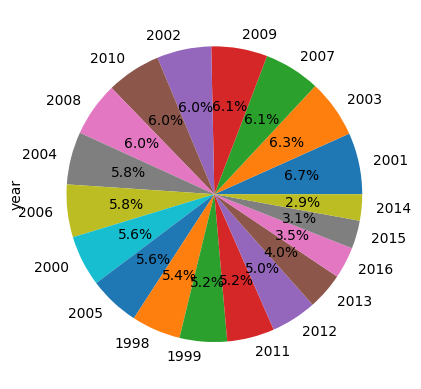

In [92]:
# Porcetaje de distribución dela data de acuerdo a los años evaluados,utilizando un grafica tipo pie.

In [8]:
df['state'].nunique()

44

In [9]:
df['state'].unique()## Numero de estados

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

In [10]:
df['year'].nunique()## Numero de años evaluados

19

In [11]:
df['year'].min() ## Numero minimo de años

1998

In [12]:
df['year'].max() ## Numero maximo de años

2016

In [13]:
df[df['totalprod'] == df ['totalprod'].max()][["state","year"]] ##****Cual es el estado con mayor producion  y en que año?  North Dakota en el 2010

,state,year
532,North Dakota,2010


In [14]:
df[['year' ,'yieldpercol']].groupby('year').mean().round() ##Cual es el redimiento promedio por colonia cada año? Podemos observar que durante los ultimos años disminuye el rendiemiento promedio de cada colonia.

,yieldpercol
year,
1998,70.0
1999,65.0
2000,68.0
2001,65.0
2002,67.0
2003,63.0
2004,65.0
2005,64.0
2006,62.0


# **Analisis de variables, univariado y multivariado.**
A continuacion realizaremos un analisis de las metricas(media, desviacion standar), exploraremoa posibles correlaciones de las variables que conforman la base de datos.

In [15]:
df.dtypes## Exploramos el tipo de varaiables  para asegurarnos que los datos se lean bien.

state           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

In [16]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
count,785.000000,785.000000,7.850000e+02,7.850000e+02,785.000000,7.850000e+02,785.000000
mean,61686.624204,60.578344,4.140957e+06,1.257629e+06,1.695159,5.489739e+06,2006.817834
std,92748.940458,19.427831,6.884594e+06,2.211794e+06,0.930623,9.425394e+06,5.491523
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000
25%,9000.000000,46.000000,4.700000e+05,1.190000e+05,1.050000,9.010000e+05,2002.000000
50%,26000.000000,58.000000,1.500000e+06,3.910000e+05,1.480000,2.112000e+06,2007.000000
75%,65000.000000,72.000000,4.096000e+06,1.380000e+06,2.040000,5.559000e+06,2012.000000
max,510000.000000,136.000000,4.641000e+07,1.380000e+07,7.090000,8.385900e+07,2016.000000


En esta tabla observamos las metricas comolas media,la desviacion estandar,el mavolor maximo,el valor minimo y la distribucuión de los datos de acuerdon los percentiles (25%,50% y 75%).
Podemos obsevar que variables como numcol, yieldpercol,priceperlb presentan valores maximos y minimos muy altos.

<ipython-input-17-d44143fe1c68>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




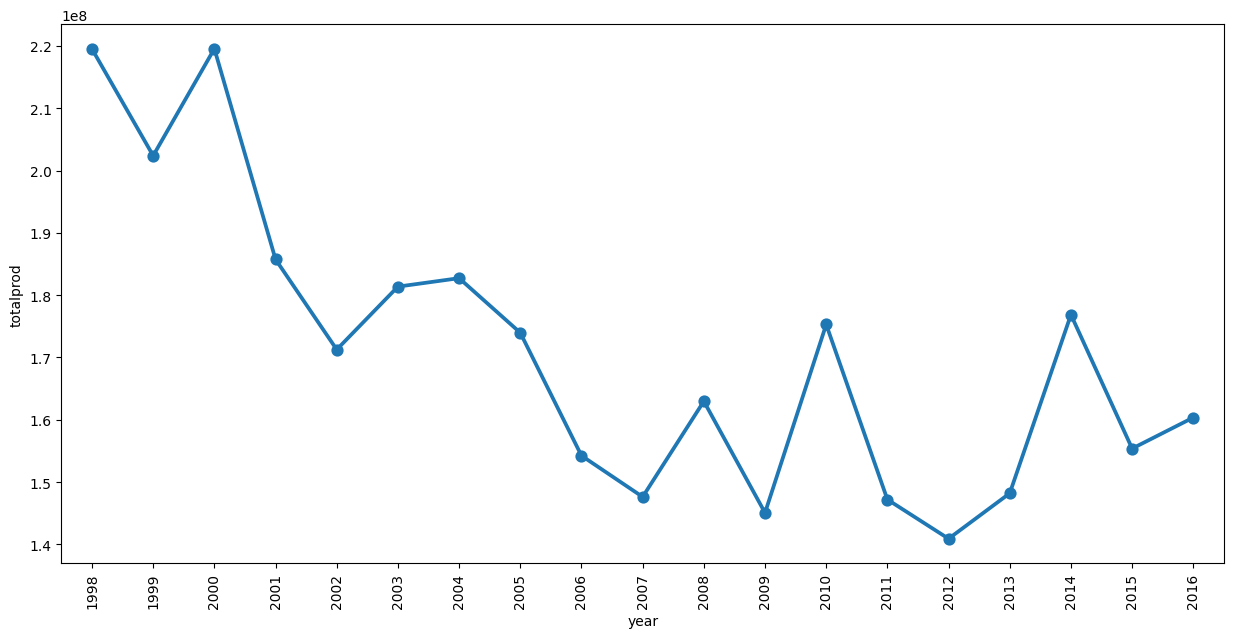

In [17]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # para girar los labls en X
plt.show()

Observaciones:

La producción total de miel en EE.UU. ha ido disminuyendo a lo largo de los años.
Producción total de miel(totalprod)= número de colonias (numcol) * rendimiento medio por colonia. Comprobemos si la producción de miel está disminuyendo debido a uno de estos factores o a ambos.

<ipython-input-18-5972af8969e0>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




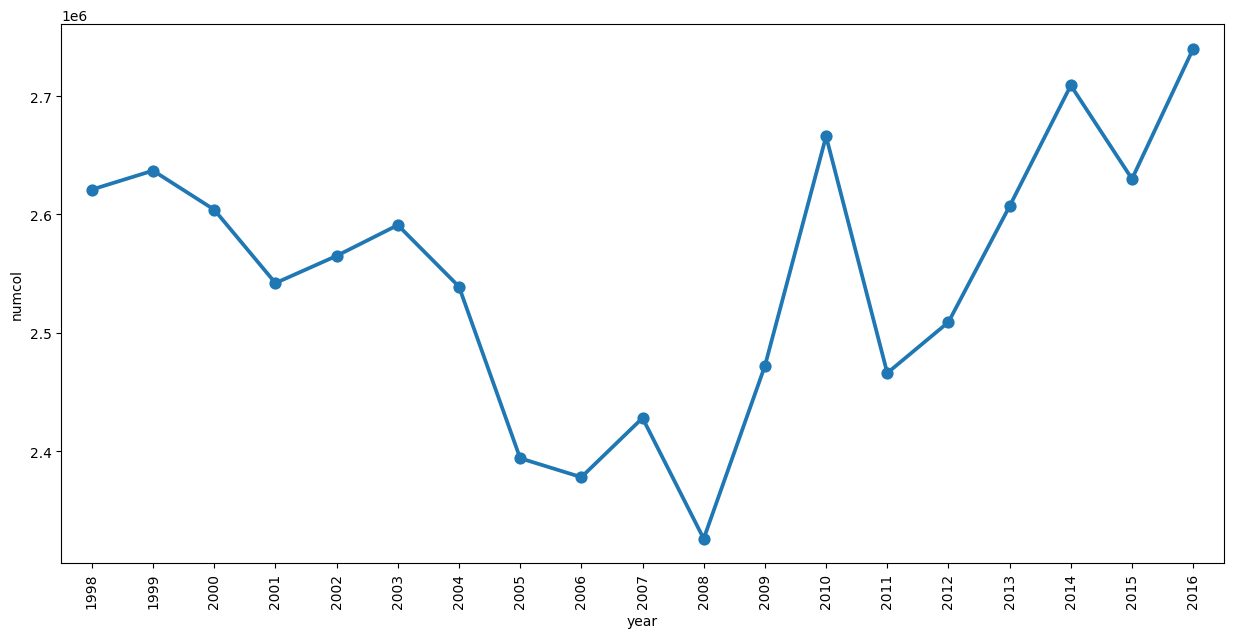

In [18]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='numcol', data=df, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observaciones:

El número(number) de colonias en todo el país muestra una tendencia a la baja entre 1998 y 2008, pero ha experimentado un repunte desde 2008.
Es posible que en 2008 se produjera alguna intervención que contribuyera a aumentar el número de colonias de abejas melíferas en todo el país.

<ipython-input-19-3b285210a47b>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




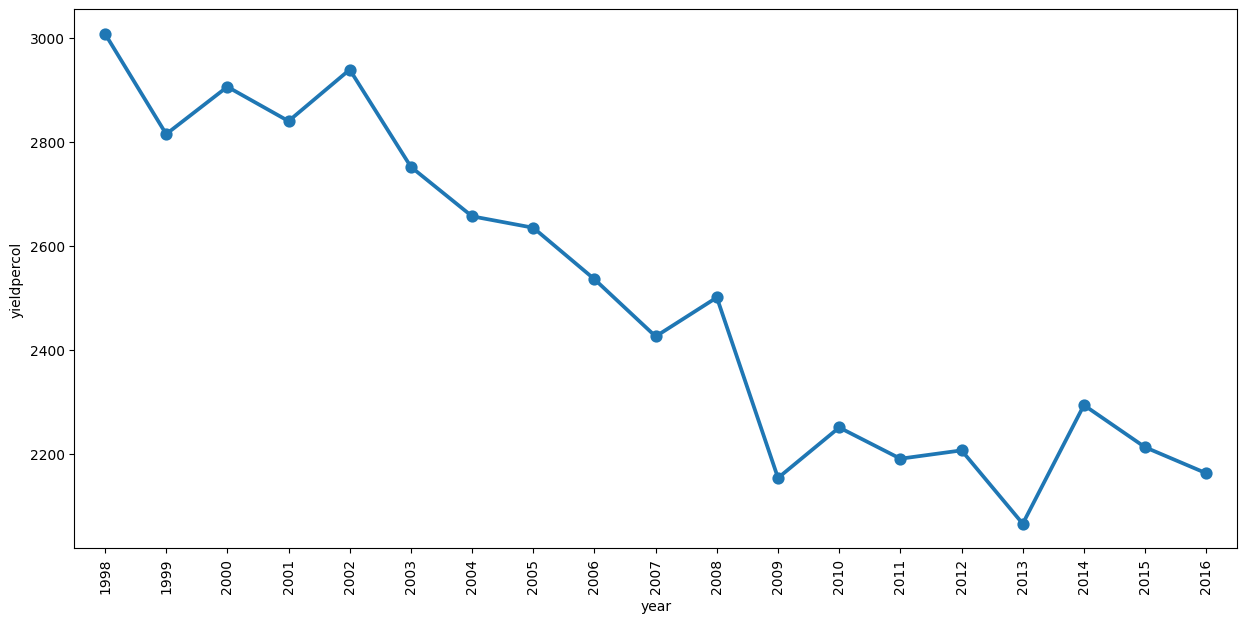

In [19]:
plt.figure(figsize=(15, 7))
sns.pointplot(x='year', y='yieldpercol', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observación:

A diferencia del número de colonias, el rendimiento por colonia disminuye desde 1998. Esto indica que no es el número de colonias lo que está provocando un descenso de la producción total de miel, sino el rendimiento por colonia.

# Revisaremos la produccion por estado

<ipython-input-20-64f4183ea2c9>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




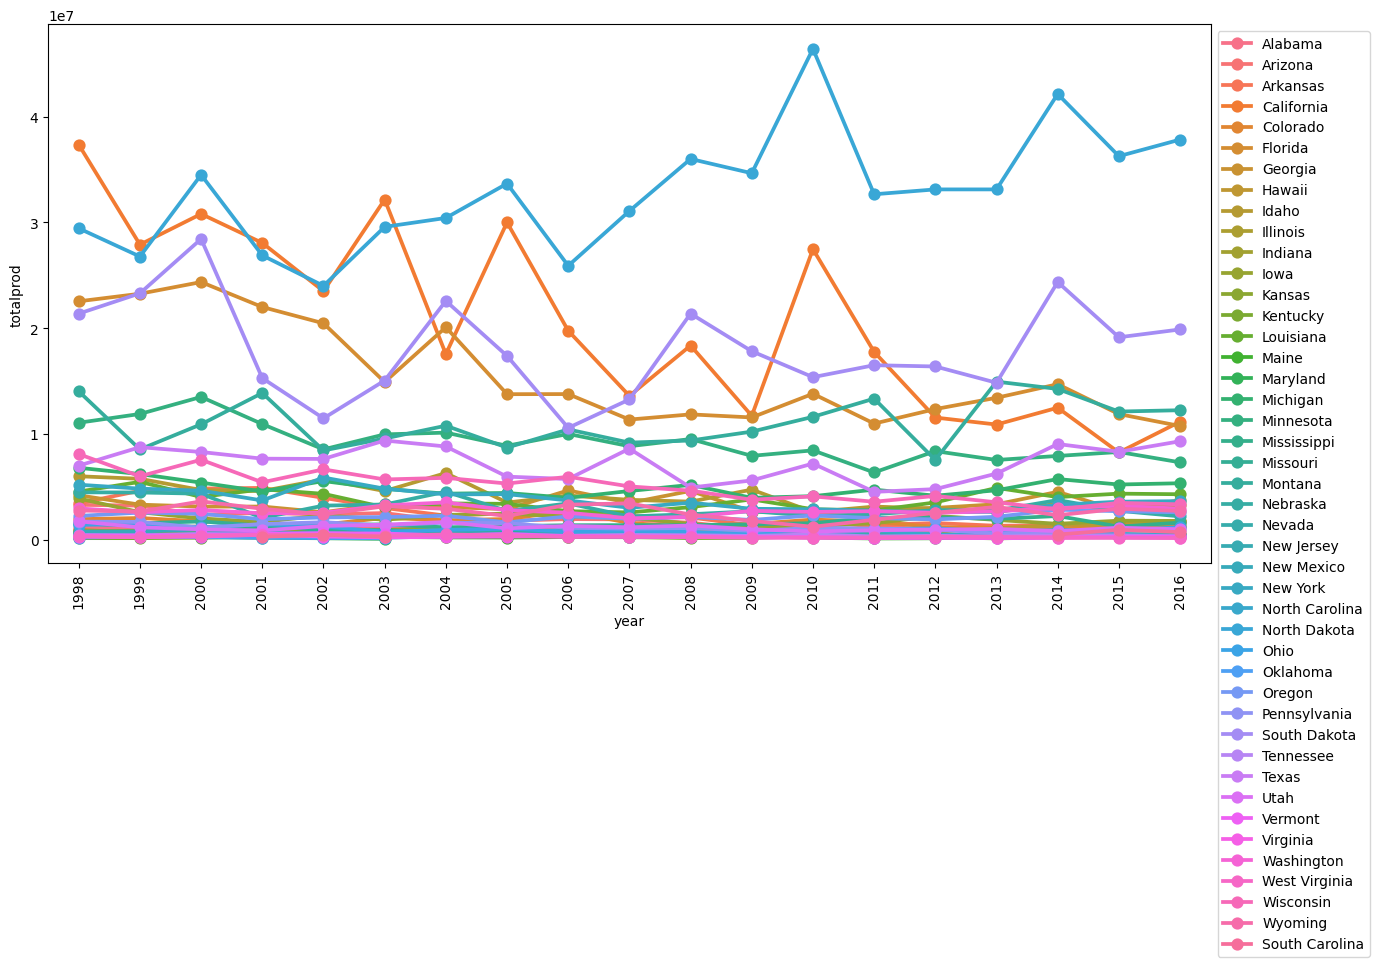

In [20]:
plt.figure(figsize=(15, 7)) # Cambiar el tamano de grafico
sns.pointplot(x='year', y='totalprod', data=df, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # Rotar las x en los ejes.
plt.show()

Observaciones: Algunos estados que tienen producciones mucho más altas que los demás, pero este gráfico es un poco difícil de leer. Intentemos representar cada estado por separado para entenderlo mejor.

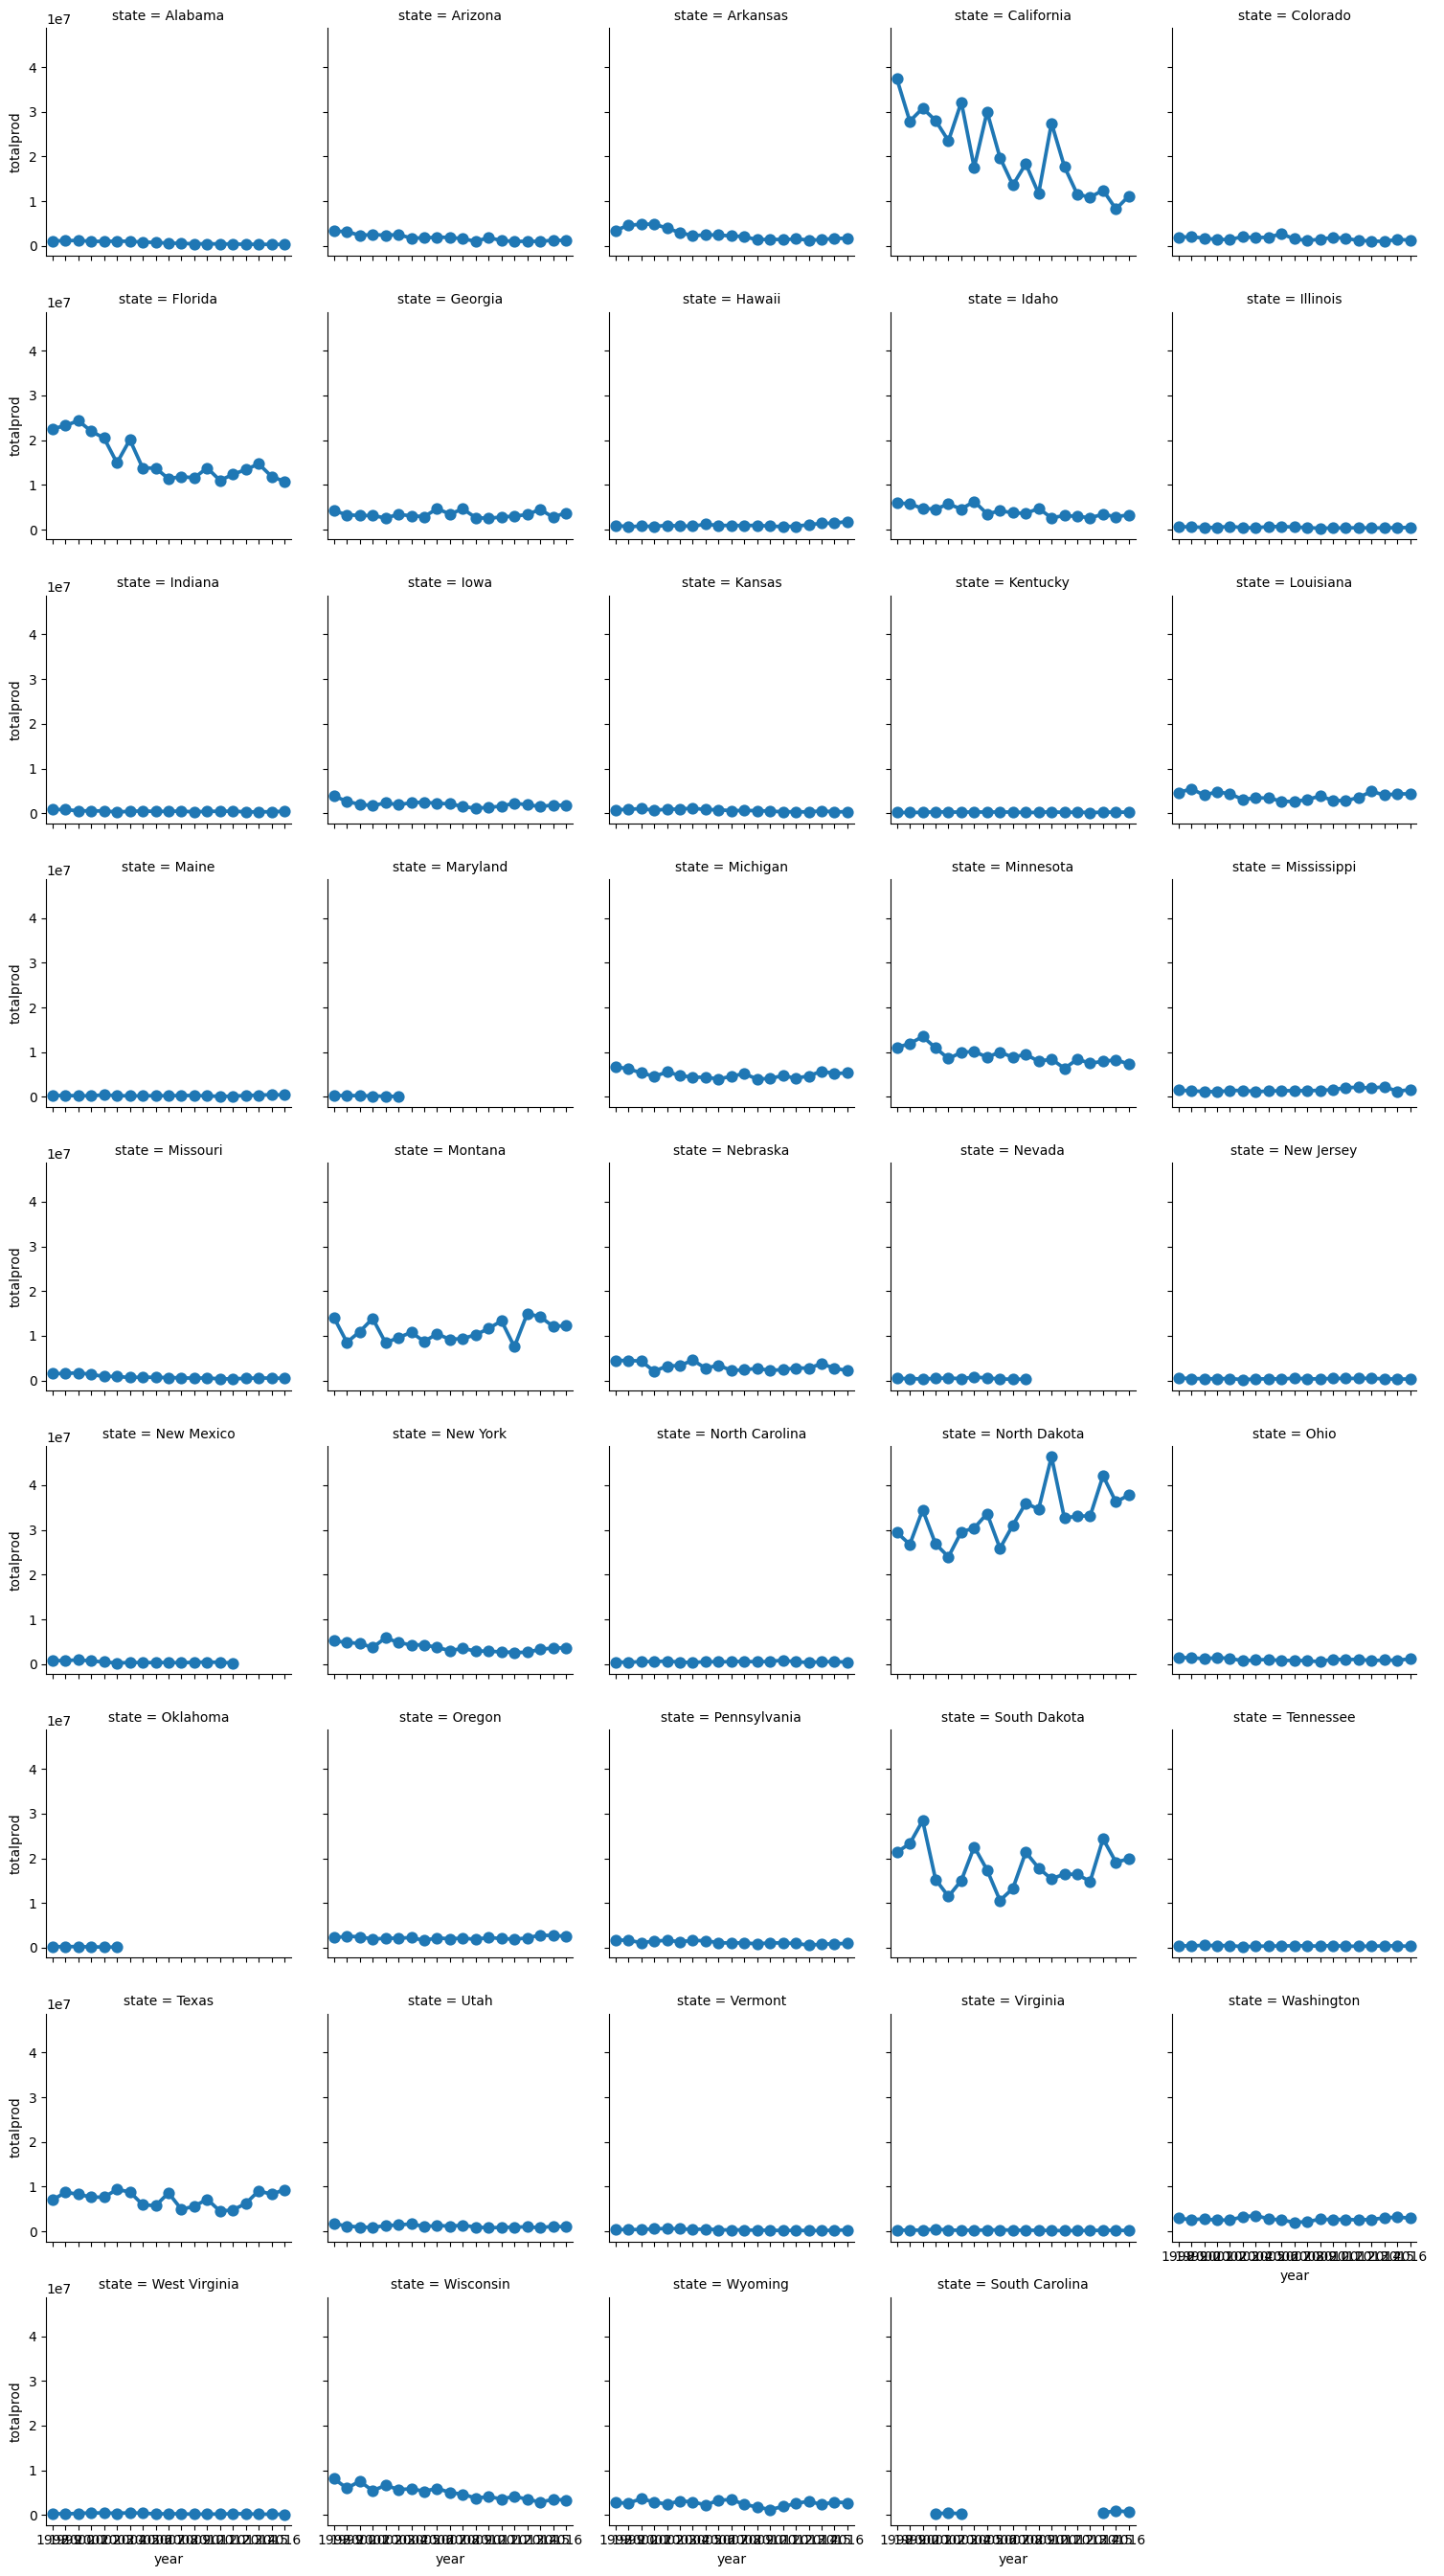

In [21]:
sns.catplot(x='year', y='totalprod', data=df,
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
plt.show()

Observaciones:

Los principales estados productores de miel de EE.UU. son California, Florida, Dakota del Norte, Dakota del Sur y Montana.
Desgraciadamente, la producción de miel en California ha experimentado un fuerte descenso a lo largo de los años.
La producción total de Florida también ha disminuido.
Dakota del Sur ha mantenido más o menos sus niveles de producción.
Dakota del Norte ha experimentado un impresionante aumento de la producción de miel.

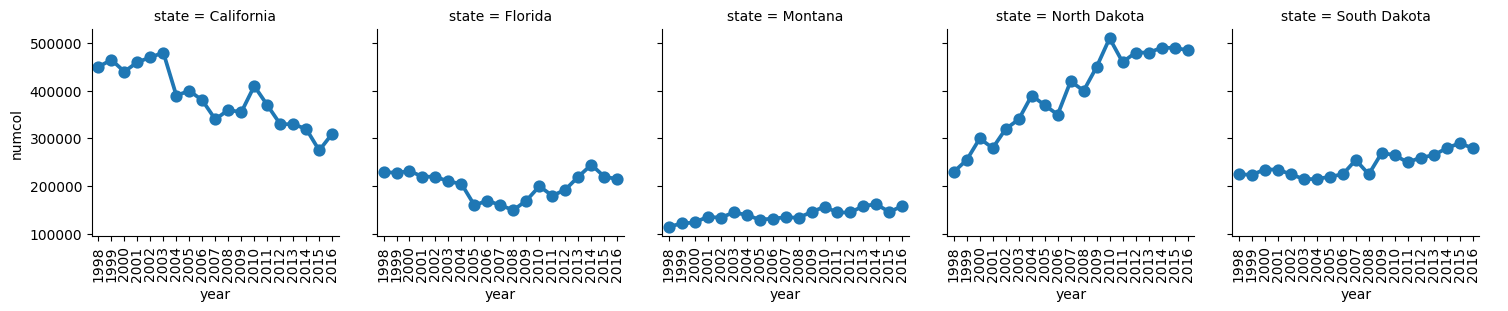

In [22]:
## Con este codigo graficaremos los estados que mas producen. Numero de colonias
cplot1=sns.catplot(x='year', y='numcol',
            data=df[df["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
cplot1.set_xticklabels(rotation=90)
plt.show()

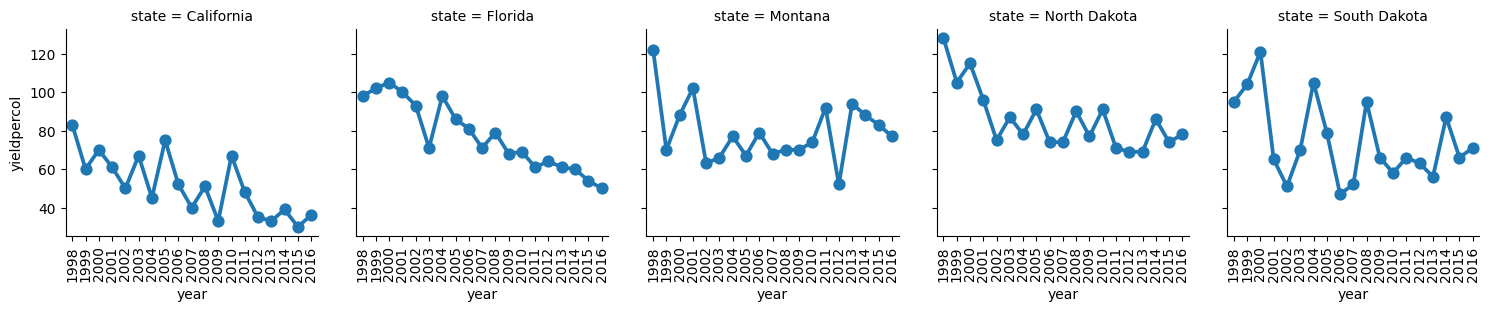

In [23]:
cplot2=sns.catplot(x='year', y='yieldpercol',
            data=df[df["state"].isin(["North Dakota","California","South Dakota","Florida","Montana"])],
                estimator=sum, col='state', kind="point",
                height=3,col_wrap = 5)
cplot2.set_xticklabels(rotation=90)
plt.show()

En Dakota del Norte, el número de colonias ha aumentado significativamente a lo largo de los años en comparación con los otros 4 estados. Si comprobamos el rendimiento por colonia, se observa una tendencia general a la baja en los 5 estados a lo largo de los años.

Veamos qué efecto ha tenido la tendencia a la baja de la producción en el valor de la producción

<ipython-input-24-86d82f8aaa01>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




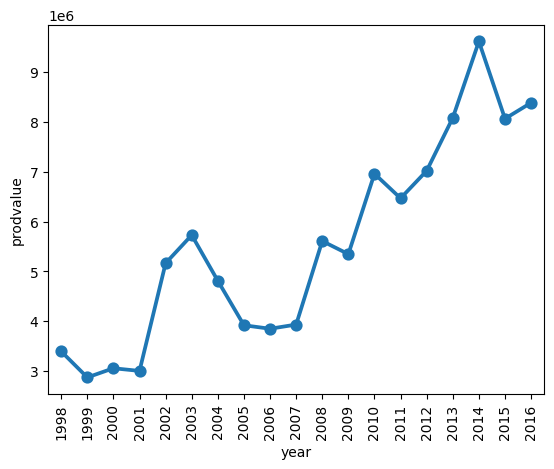

In [24]:
sns.pointplot(x="year", y="prodvalue", data=df, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls
plt.show()

Observaciones:

Se trata de una tendencia interesante. A medida que la producción total ha disminuido a lo largo de los años, el valor de la producción por libra ha aumentado con el tiempo. Al disminuir la oferta, la demanda ha aumentado el valor de la miel.

Comprobemos cuáles son los Estados que han aprovechado esta tendencia. Podemos comparar la producción total con las existencias de los productores

<ipython-input-25-9566326af652>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-25-9566326af652>:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




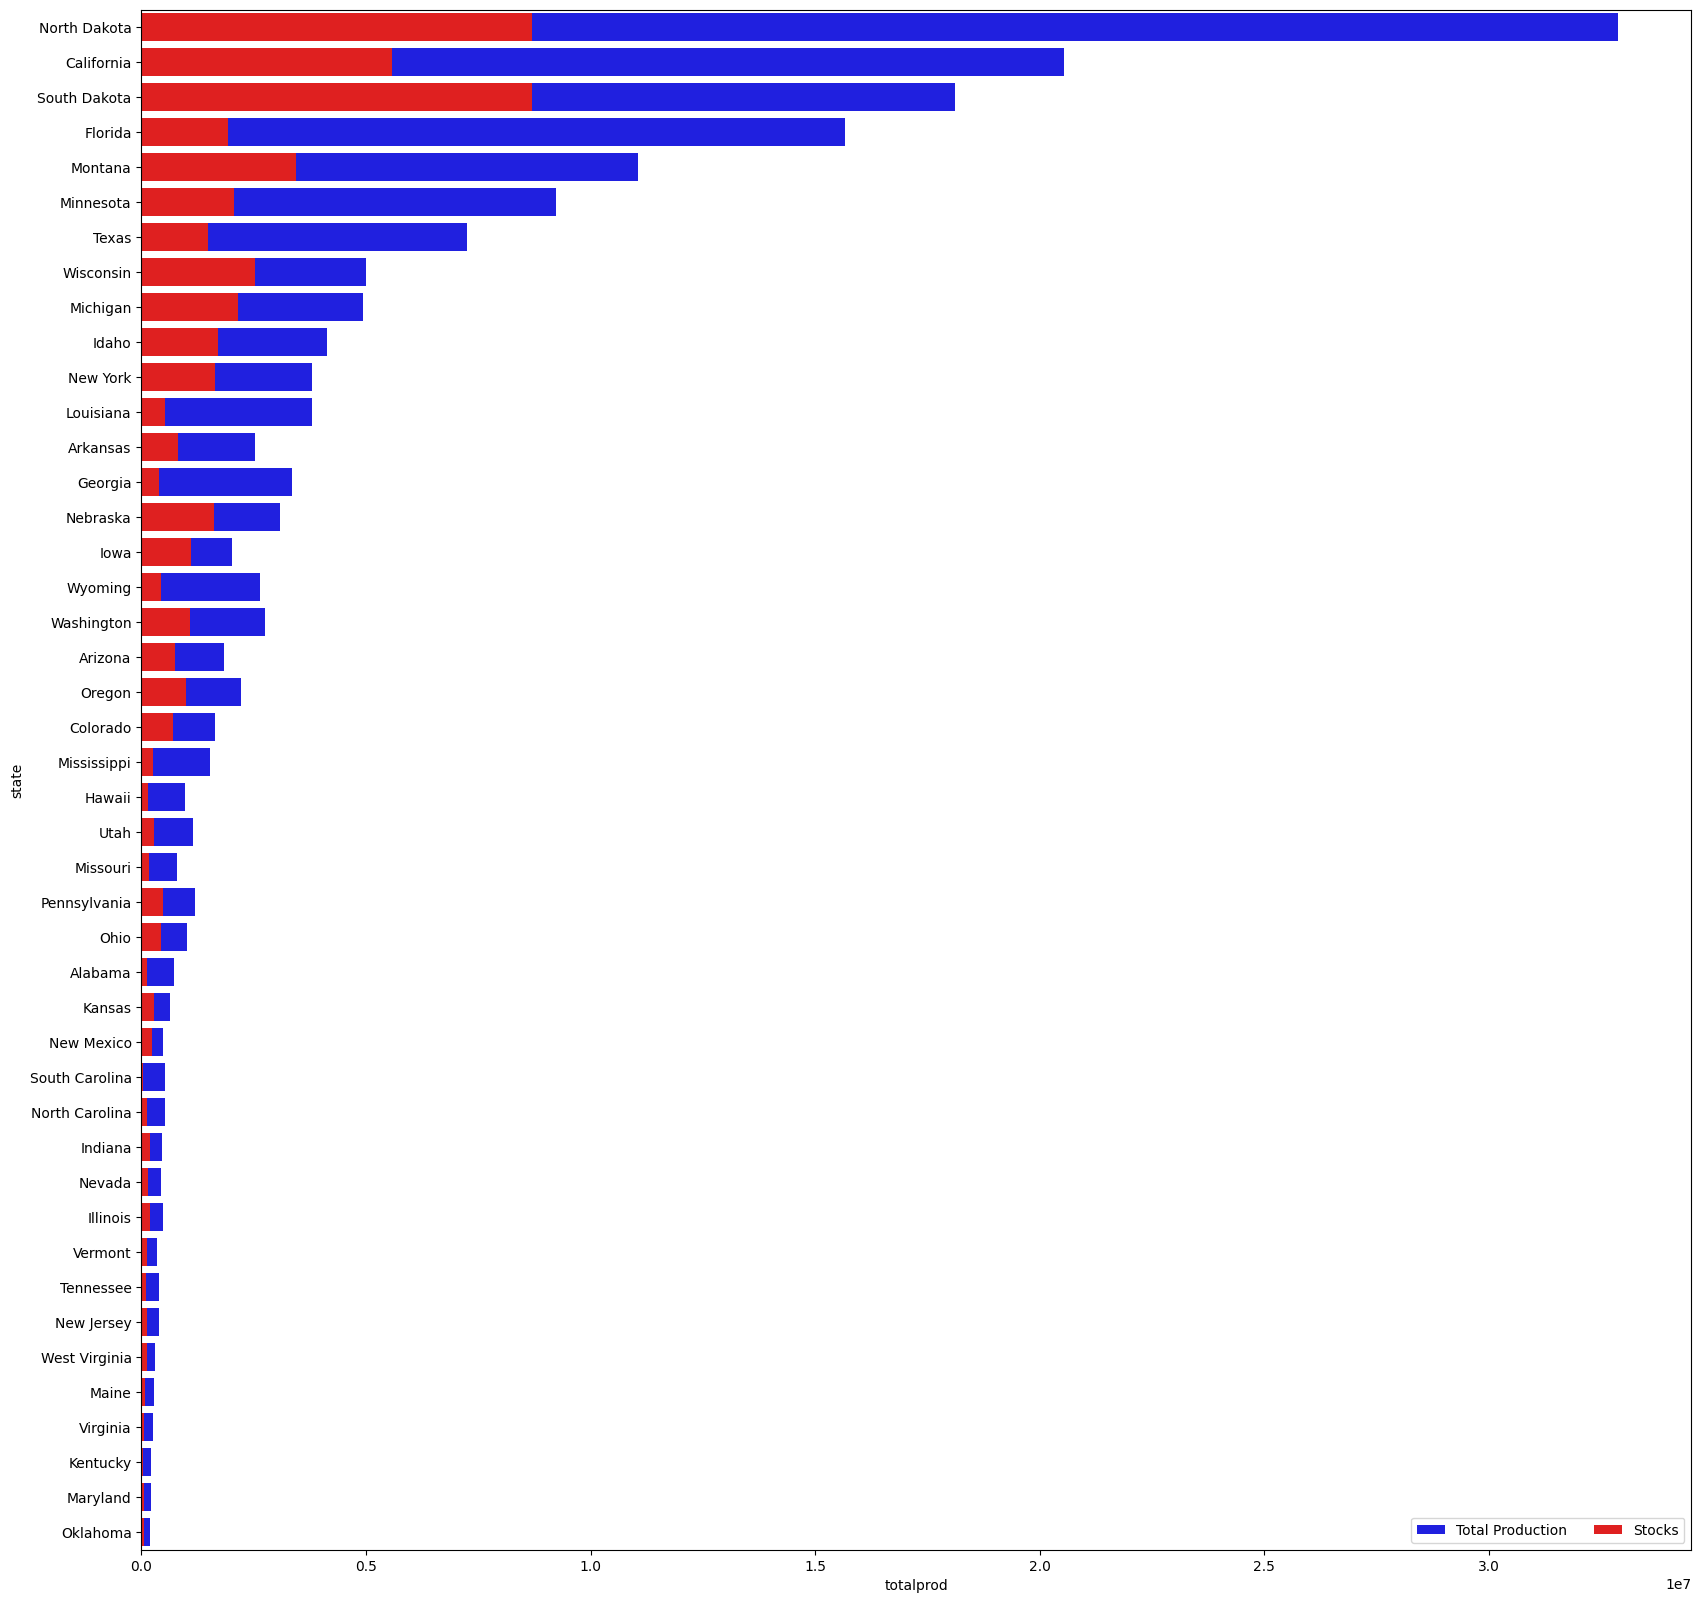

In [25]:
plt.figure(figsize = (20,20)) # Tamano del plot

# Produccion total por estado
sns.barplot(x="totalprod", y="state", data=df.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", ci=None)

# Plot existencia por estado
sns.barplot(x="stocks", y="state", data=df.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)

#  leyenda
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

Observaciones:

1.Dakota del Norte ha conseguido vender más miel que Dakota del Sur a pesar de tener el mayor valor de producción. 2.Florida tiene la mayor eficiencia entre los principales estados productores de miel 3.Michigan es más eficiente que Wisconsin en la venta de miel.

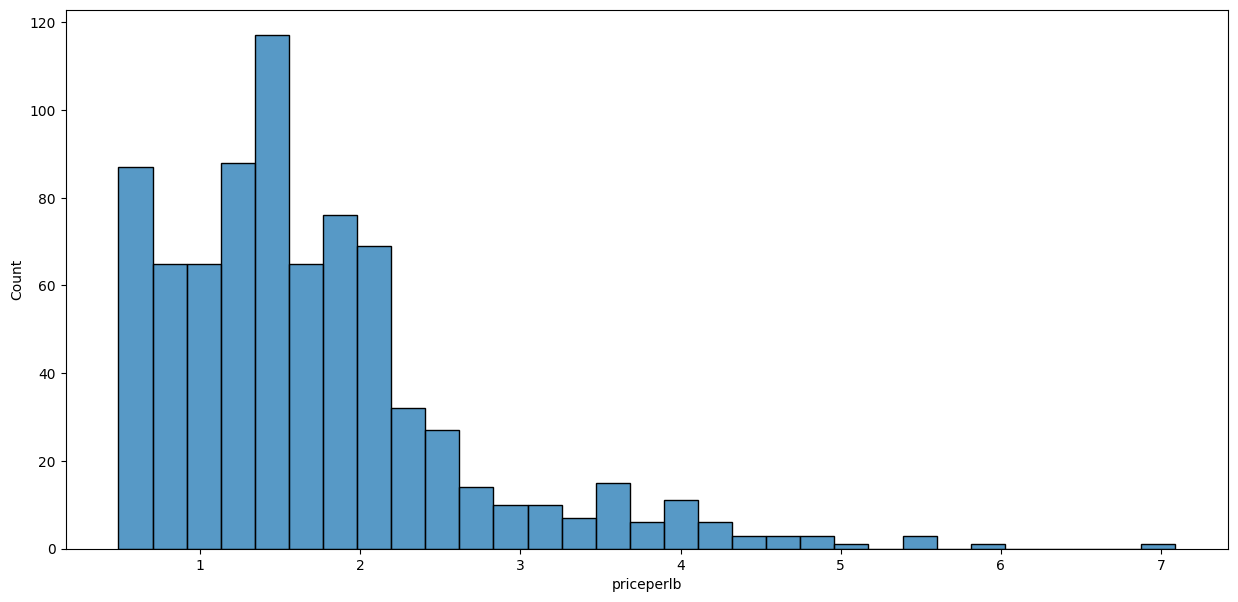

In [26]:
plt.figure(figsize=(15, 7))
sns.histplot(df.priceperlb)
plt.show()

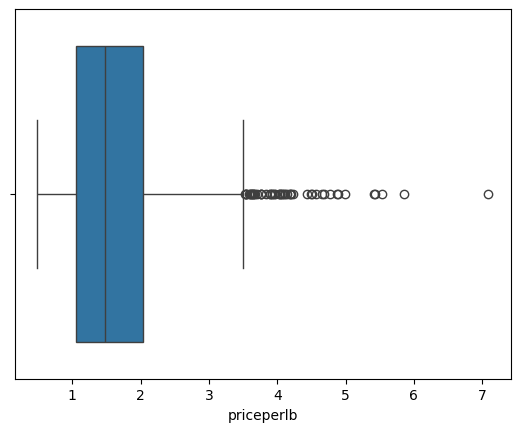

In [27]:
sns.boxplot(data = df, x = 'priceperlb')
plt.show()

Observaciones:

El precio por libra de miel tiene una distribución sesgada a la derecha, con muchos valores atípicos hacia el extremo superior. La mediana del precio por libra de miel es de 1,5 euros.

Veamos el precio medio por libra de miel en los distintos estados

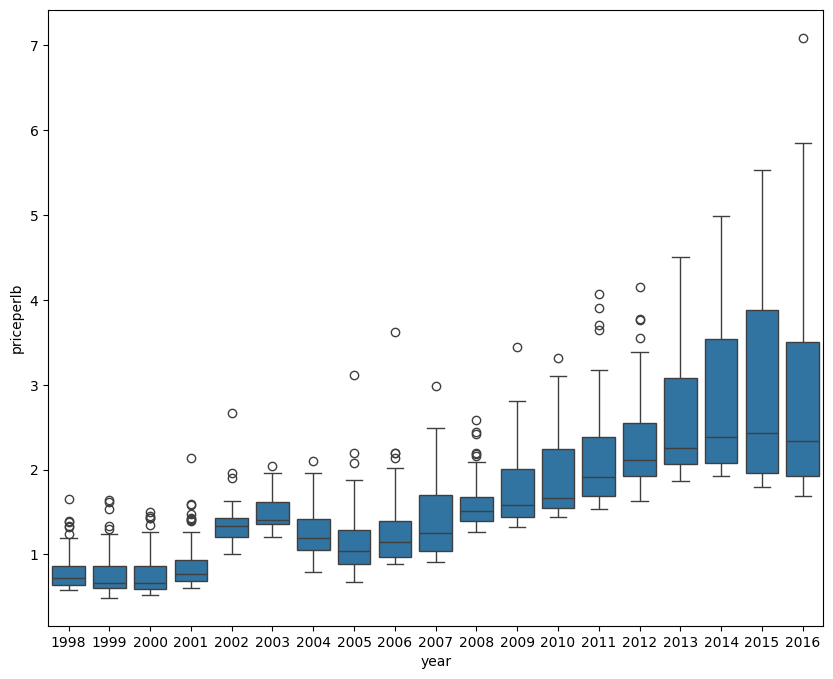

In [28]:
fig, a1 = plt.subplots(1,figsize=(10,8))
sns.boxplot(data = df, x = 'year', y = 'priceperlb')
plt.show()

<ipython-input-29-cb9f1e462e28>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




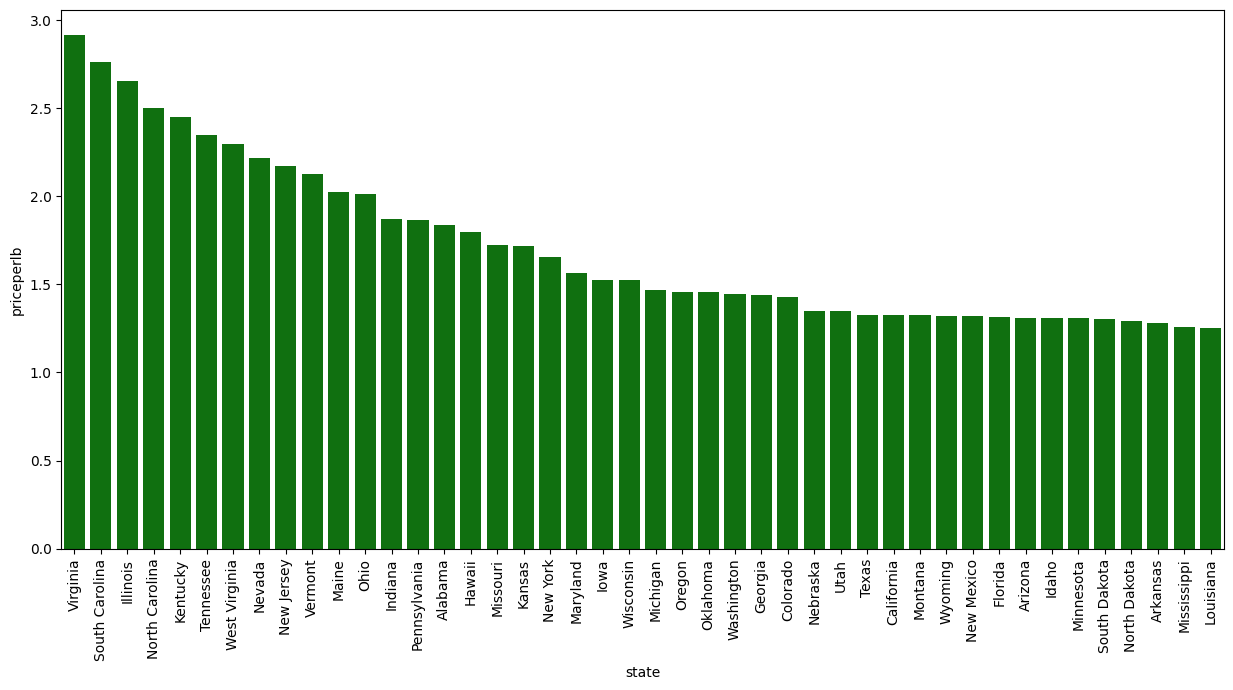

In [29]:
plt.figure(figsize=(15, 7)) # Tamaño del grafico
sns.barplot(data = df, x = "state", y = "priceperlb", ci=None, color = "green",
            order=df.groupby('state').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90) # Rotar los lables en X
plt.show()

Observaciones:

Virginia tiene el precio (priceperlib) más alto por libra de miel. El precio medio por libra de miel en los principales estados productores se sitúa en el extremo inferior. Conclusión Podemos concluir que la producción total de miel ha disminuido a lo largo de los años, mientras que el valor de la producción por libra ha aumentado. La razón del descenso de la producción de miel es la disminución del rendimiento por colonia a lo largo de los años. Los principales estados productores de miel son California, Florida, Dakota del Norte, Dakota del Sur y Montana. Entre ellos, Florida ha sido muy eficiente en la venta de miel.

# **Feature Engineering** **texto en negrita**
Revisaremos los datos y los limpiaremos para trabajar con Machinig learning.
Feature Engineering es elproceso de selccionar,modificary crear variables/features/caracteristicas de un conjunto de datos para mejorar su analisis y rendimiento en cualquier modelo que queremos aplicar,principalmente en machine learning.

1.Valores duplicados

In [30]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
780    False
781    False
782    False
783    False
784    False
Length: 785, dtype: bool

Podemos Notar que no tenemos ningun valor  duplicado.

**Tratamiento de valores nulos**

In [31]:
# Eliminar filas que contienen al menos un valor nulo
df_sin_nulos = df.dropna()

# Eliminar columnas que contienen al menos un valor nulo
df_sin_nulos_columnas = df.dropna(axis=1)

In [ ]:
df_sin_nulos.shape

(785, 8)

In [32]:
df_sin_nulos

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
780,Virginia,5000.0,38,190000.0,30000.0,5.85,1112000.0,2016
781,Washington,84000.0,35,2940000.0,412000.0,1.99,5851000.0,2016
782,West Virginia,5000.0,32,160000.0,43000.0,3.92,627000.0,2016
783,Wisconsin,54000.0,62,3348000.0,1205000.0,2.67,8939000.0,2016


Vemos que el dataset no tiene valores nulos.

Realizaremos un grafico para observar las correlaciones presentes en cada variable analizada.

In [33]:
correlation = df.corr() # creating a 2-D Matrix with correlation plots
correlation

<ipython-input-33-93646883673a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
numcol,1.000000,0.224539,0.951822,0.820076,-0.211427,0.898989,0.026711
yieldpercol,0.224539,1.000000,0.382945,0.358676,-0.360571,0.255789,-0.248737
totalprod,0.951822,0.382945,1.000000,0.876872,-0.239085,0.895242,-0.040497
stocks,0.820076,0.358676,0.876872,1.000000,-0.275926,0.713161,-0.115520
priceperlb,-0.211427,-0.360571,-0.239085,-0.275926,1.000000,-0.061833,0.733959
prodvalue,0.898989,0.255789,0.895242,0.713161,-0.061833,1.000000,0.188790
year,0.026711,-0.248737,-0.040497,-0.115520,0.733959,0.188790,1.000000


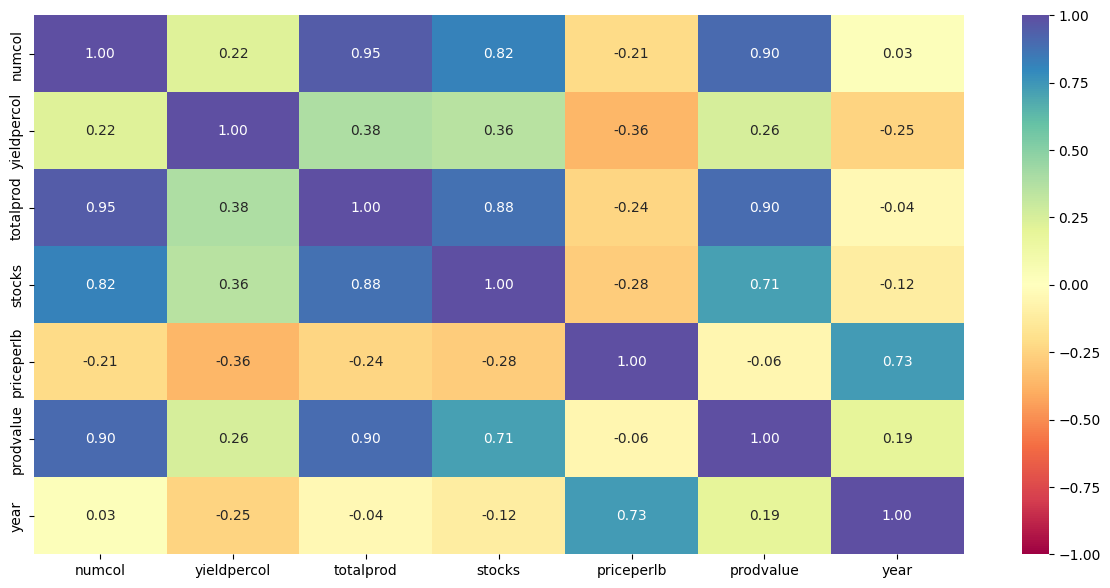

In [34]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

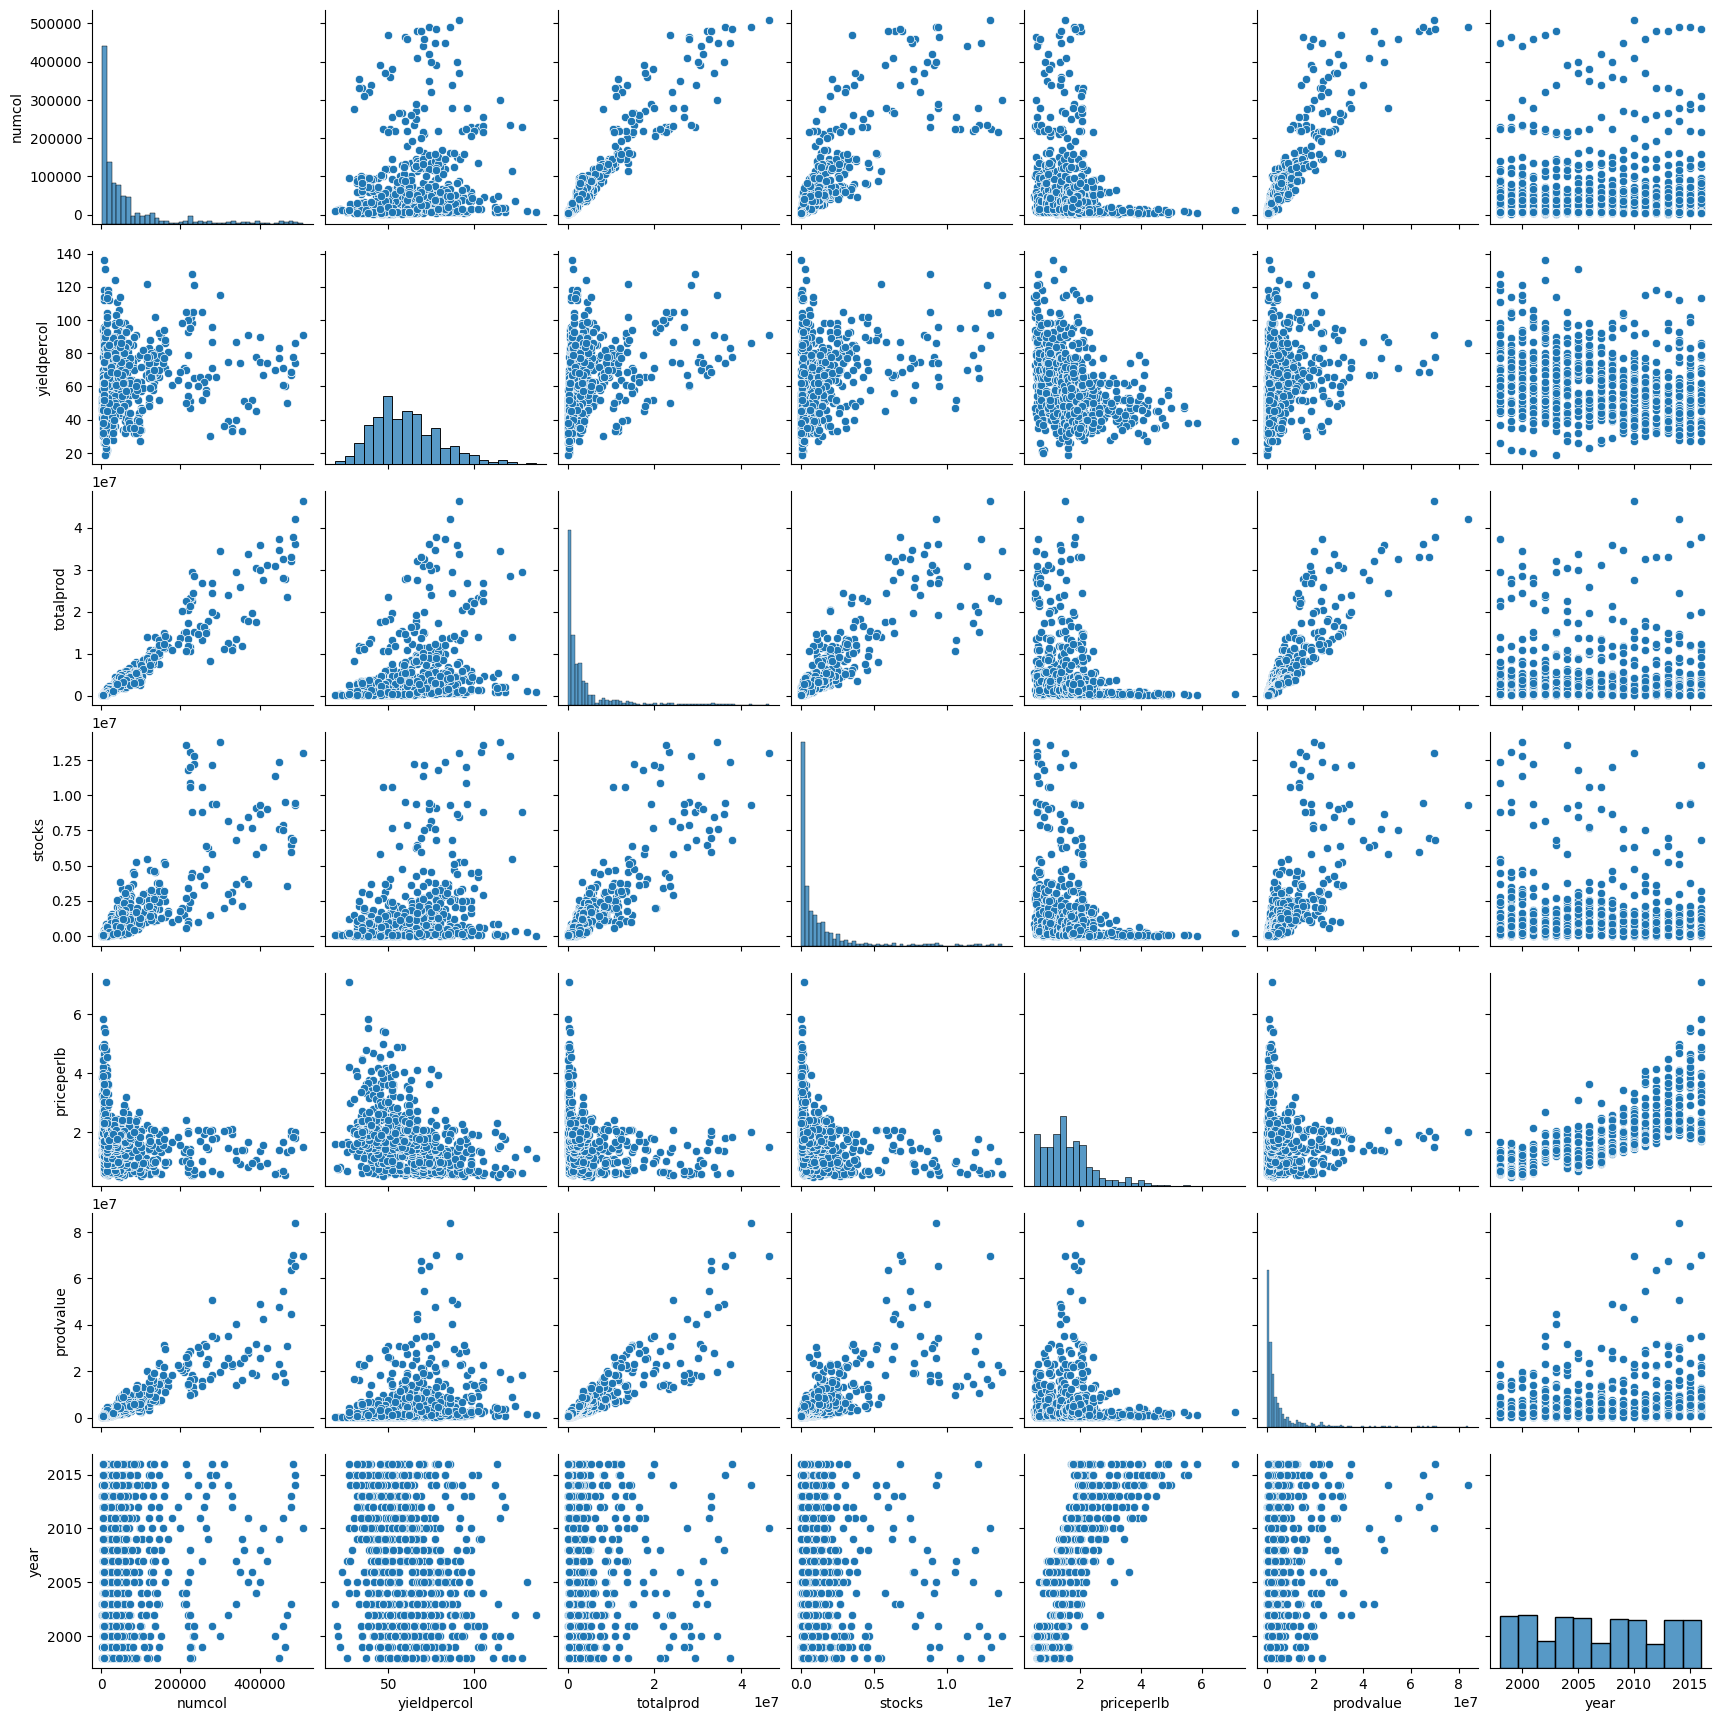

In [35]:
sns.pairplot(df)

En este grafico observamos de manera grafica las variables que presentan una relacion lineal.

# *Limpieza de Outliers *

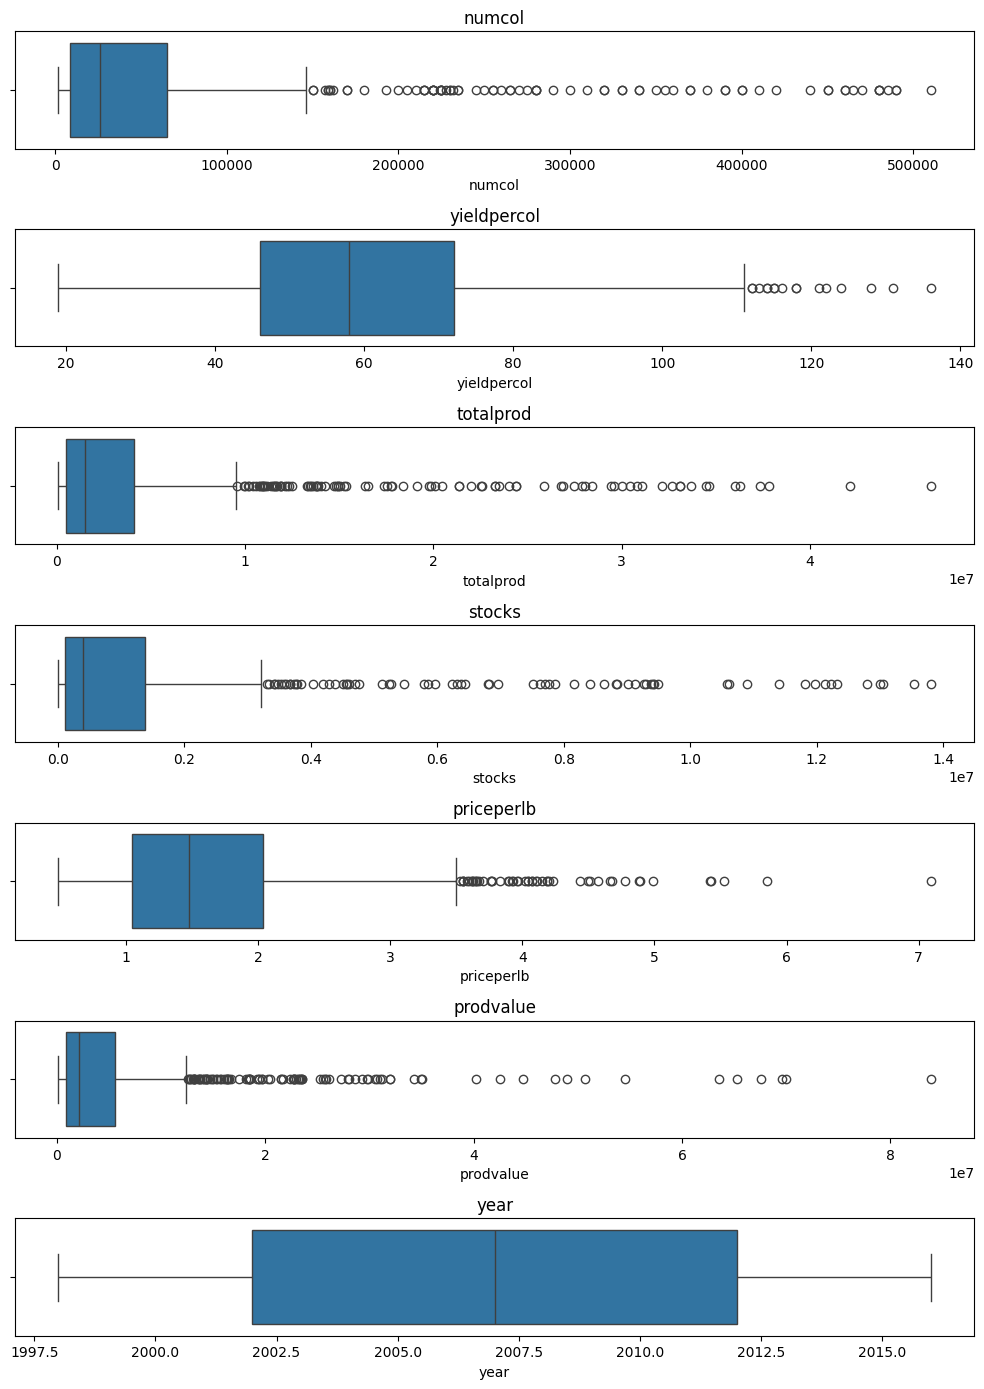

In [36]:
## Grafiqueramos las variables con boxplot,de esta manera miraremos la distribucion de los datos.
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


In [37]:
!pip install pandas

# ***Limpiamos los outlaires.***

In [38]:
# Lista de columnas con outliers
columns_with_outliers = ['numcol', 'yieldpercol', 'totalprod', 'stocks',
                          'priceperlb','prodvalue']

# Definir una función para eliminar outliers basados en el IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Eliminar outliers en las columnas especificadas
for col in columns_with_outliers:
    df = remove_outliers(df, col)

# Ahora df no tiene outliers en las columnas especificadas

# **Graficamo las variable que ya no presentan outliers.** *texto en cursiva*

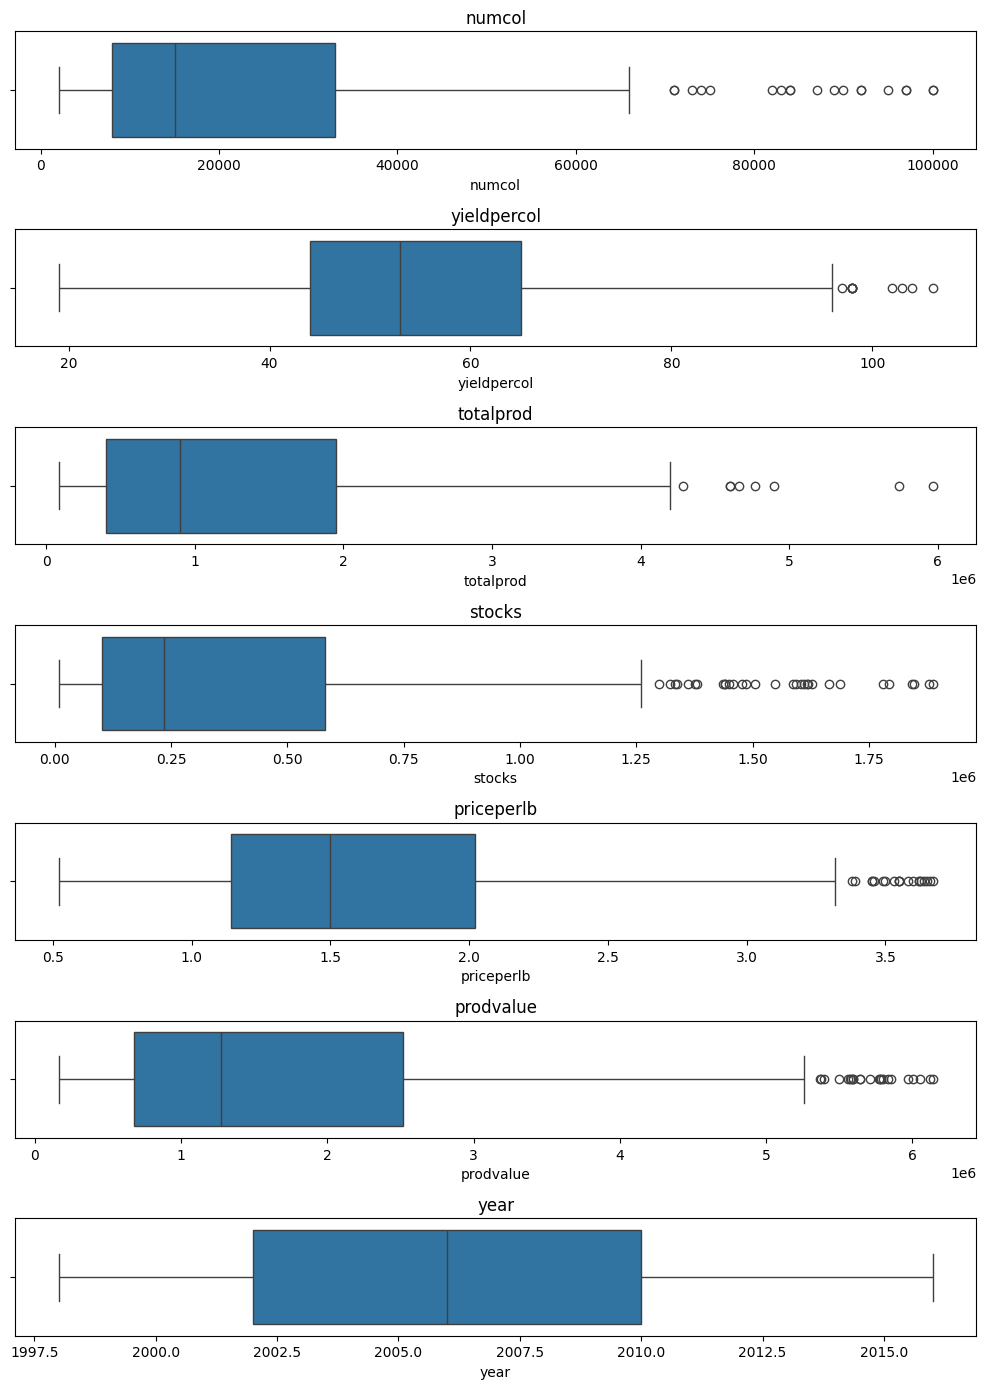

In [39]:

# Ahora df no tiene outliers en las columnas especificadas
df_numeric = df.select_dtypes(include='number')
# Supongamos que df es tu DataFrame
num_cols = df_numeric.select_dtypes(include=['float64', 'int64']).columns

# Crear subgráficos
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 2*len(num_cols)))

# Generar boxplots individuales
for i, col in enumerate(num_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Dateset sin Outlieres.

In [44]:
df.shape

(521, 9)

In [45]:
df.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,stockFilt
count,521.000000,521.000000,5.210000e+02,5.210000e+02,521.000000,5.210000e+02,521.000000,521.000000
mean,23182.341651,55.879079,1.284159e+06,4.131132e+05,1.631516,1.797225e+06,2006.234165,413.113244
std,20116.089883,16.373018,1.094879e+06,4.285452e+05,0.723198,1.458020e+06,5.110967,428.545187
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.520000,1.620000e+05,1998.000000,8.000000
25%,8000.000000,44.000000,4.050000e+05,1.010000e+05,1.140000,6.760000e+05,2002.000000,101.000000
50%,15000.000000,53.000000,9.010000e+05,2.350000e+05,1.500000,1.276000e+06,2006.000000,235.000000
75%,33000.000000,65.000000,1.950000e+06,5.800000e+05,2.020000,2.517000e+06,2010.000000,580.000000
max,100000.000000,106.000000,5.964000e+06,1.887000e+06,3.670000,6.138000e+06,2016.000000,1887.000000


In [46]:
### Identificación de datos ausentes
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
stockFilt      0
dtype: int64

Creación de Features

In [48]:
##Crearemos un nuevo features
stockFilt = (df['stocks'])
df['stockFilt']=stockFilt/1000
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,stockFilt
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998,159.0
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998,1485.0
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998,1688.0
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998,1594.0
6,Georgia,75000.0,56,4200000.0,307000.0,0.69,2898000.0,1998,307.0
...,...,...,...,...,...,...,...,...,...
773,Pennsylvania,19000.0,50,950000.0,266000.0,3.03,2879000.0,2016,266.0
778,Utah,31000.0,32,992000.0,169000.0,1.93,1915000.0,2016,169.0
779,Vermont,6000.0,52,312000.0,69000.0,3.64,1136000.0,2016,69.0
781,Washington,84000.0,35,2940000.0,412000.0,1.99,5851000.0,2016,412.0


# **MACHINE LEARNING**
 Scikit-learn, o sklearn, se utiliza específicamente para el Aprendizaje Automático. Dentro del módulo linear_model, hay una función LinearRegression() que  utilizaremos.
 Relizaremos una regresion multiple donde nuestra variable dependiente sera (year)  y las variables independientes seran ( state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue )
 Normalizaremos a modo de ejercicio con el metodo MinMax de la libreria sklearn.

In [49]:
### Primero correr pip install scikit-learn en la Terminal o CMD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [95]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'stockFilt'],
      dtype='object')

In [107]:
# De acuerdo con el dataset  , para el analisis utilizamos las siguientes variables ((features))
selected_features = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year', 'stockFilt']

# DIVISION DE DATOS DE (Entrenamiento/Train del modelo y pruba /Test)
Divisón de datos  cojunto de datos de entrenamiento y prueba.

test_size: Este párametro determina la proporcion de datos que se asignaron alconjunto de datos de prueba , en este caso, test_size = 0.2, significa que el 20% se utilizara como conjunto de prueba.

randon state: Este parametro garantiza que la divsion de datos sea reproducible.

In [109]:
# Definir variables predictoras (X) y la variable objetivo (y)
X = df[selected_features]
y = df['year']

In [110]:
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamiento del Modelo

In [111]:
#modelo de regresión (puedes cambiar el algoritmo según prefieras)
# Documentación del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model = LinearRegression()

# Entrenamiento del **Modelo**

In [113]:
model.fit(X_train, y_train)

LinearRegression()

# **Predicciones del modelo**

In [114]:
predictions = model.predict(X_test)

In [115]:
predictions

array([2016., 2001., 1998., 2006., 2001., 2009., 2003., 2008., 2007.,
       2014., 2003., 2003., 2015., 2016., 1998., 2013., 2010., 1999.,
       2004., 2006., 2003., 2001., 2002., 2002., 2005., 2007., 2000.,
       2010., 2011., 2005., 2012., 2003., 2008., 1998., 2015., 2000.,
       2004., 2002., 2010., 2004., 2001., 2002., 2000., 2016., 2012.,
       2004., 2007., 2001., 2015., 2009., 2002., 2001., 2000., 2005.,
       2005., 2010., 2002., 2000., 1998., 2000., 2010., 2008., 2012.,
       2007., 2000., 2003., 2001., 2000., 2013., 1999., 2000., 2000.,
       1998., 1998., 2006., 1998., 2011., 2013., 2016., 2000., 2015.,
       2009., 1998., 2003., 2005., 2007., 2016., 1999., 2013., 1999.,
       2014., 2004., 2011., 2015., 2007., 2006., 2015., 2008., 2005.,
       2008., 2000., 2014., 2008., 2007., 2007.])

# **Evaluación del modelo**

El coeficiente de determonación (R-squared) es una métrica que indica la proporción de la varianza en la variable dependienteue es predecible a partir de las variables independientes en un modelo de regresión. Se calcula como la proporción de la varianza explicada con respecto a la varianza total.

En otras palabras, R-squared mide qué tan bien las predicciones del modelo se ajustan a los datos observados.

El R-squared varía entre 0 y 1, donde:

0 indica que el modelo no explica la variabilidad de la variable dependiente.
1 indica que el modelo explica toda la variabilidad de la variable dependiente.

In [104]:
# Calcula el R-squared
r_squared = r2_score(y_test, predictions)
print(f'R-squared: {r_squared}')

R-squared: 0.7308891263938746


De acuerdo al valor del r2 nos indica que no es un buen modelo los datos no se pueden modelar  con precisión en absoluto.
Estamos trando de ajustar una recta a algo que no es una recta.*texto en cursiva*

  Error cuadrático medio MSE Y RMSE
  El error cuadrático medio (MSE, por sus siglas en inglés, Mean Squared Error) es una métrica que mide el promedio de los cuadrados de los errores entre las predicciones de un modelo y los valores reales. Cuanto más bajo sea el valor del MSE, mejor será el rendimiento del modelo, ya que indica que las predicciones están más cerca de los valores reales.
  

In [117]:
# Calcular MSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

# Imprimir el resultado
print(f'Test RMSE: {rmse}')
print(f'Test MSE: {mse}')

Test RMSE: 1.6096110856896515e-12
Test MSE: 2.5908478471750188e-24


# Grafico de dispersión

En este gráfico, cada punto representa una observación en tus datos de prueba. Si el modelo fuera perfecto, todos los puntos deberían estar en una línea diagonal. Sin embargo, en la realidad, es probable que haya alguna dispersión alrededor de esa línea, y el objetivo es minimizar esa dispersión.

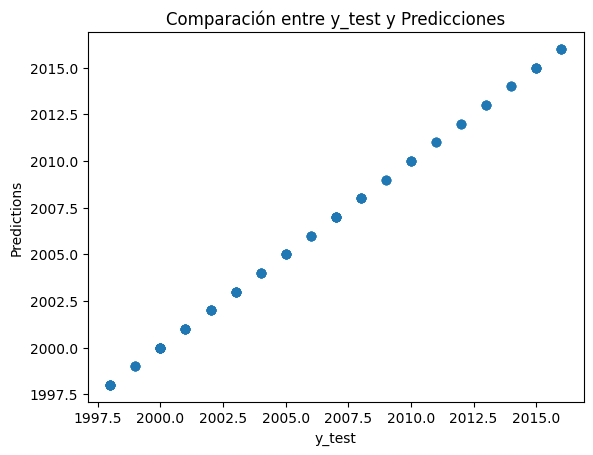

In [118]:
# Gráfico de dispersión
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.title('Comparación entre y_test y Predicciones')
plt.show()

In [121]:
from sklearn.linear_model import LinearRegression

# Supongamos que tienes tus datos en arrays numpy X (variables independientes) y y (variable dependiente)

# Instancia el modelo de regresión lineal
modelo = LinearRegression()

# Ajusta el modelo a tus datos
modelo.fit(X, y)

# Obtiene los coeficientes de regresión
coeficientes = modelo.coef_

# Imprime los coeficientes de regresión
print("Coeficientes de regresión:")
for i, coef in enumerate(coeficientes):
    print(f"Variable {i+1}: {coef}")

Coeficientes de regresión:
Variable 1: 0.6459748856967951
Variable 2: -1.7396519311910967
Variable 3: -0.42284085156519396
Variable 4: 0.20477699369104524
Variable 5: 0.4102841974255554
Variable 6: 0.2567553147481039
Variable 7: -0.9979667625863351
Variable 8: 1.0585430966635707
Variable 9: 0.9067101582154382


En una regresón lineal, el peso realtivo se representa por el coeficiente de regresión asociado a esa variable. Este coeficiente indica cuanto  cambia la variable dependiente por cada unidad de cambio de la variable independiente.

# **PCA**

In [116]:
from sklearn.decomposition import PCA

# Tienes tus datos en una matriz X, donde cada fila representa una observación y cada columna una variable
# Ejemplo, X puede ser una matriz de tamaño (n_observaciones, n_variables)

#En elcaso de nuestro dataset
X = np.random.rand(521, 9)  # 521 observaciones, 9 variables

# Instancia un objeto PCA
pca = PCA()

# Ajusta el PCA a tus datos
pca.fit(X)

# Obtiene los pesos relativos de las variables
weights = pca.components_

# Imprime los pesos relativos de las variables
print("Pesos relativos de las variables:")
for i, component in enumerate(weights):
    print(f"Variable {i+1}: {component}")

# También puedes imprimir la proporción de varianza explicada por cada componente
print("\nProporción de varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)


Pesos relativos de las variables:
Variable 1: [ 0.6954318   0.35687893  0.11651901  0.13327888  0.06909438 -0.08844182
  0.25122382  0.5235511   0.08863942]
Variable 2: [-0.13086825 -0.15841898  0.4620961   0.33979856 -0.10760804 -0.59605004
  0.32566619 -0.08500856 -0.38553989]
Variable 3: [ 0.1796107  -0.6341348  -0.15170075 -0.43436411  0.29854672  0.06636966
  0.45565203  0.12393535 -0.1934268 ]
Variable 4: [-0.22766368  0.35189647  0.17472471 -0.24329657  0.71117027 -0.0933478
 -0.24539389  0.15604895 -0.36819801]
Variable 5: [-0.29751438 -0.01033215 -0.46782272  0.65604716  0.23172705  0.23824544
  0.2514377   0.25442285 -0.15398779]
Variable 6: [-0.02679022  0.09385502  0.13331116 -0.14398105 -0.49072435  0.4564114
 -0.04614272  0.25438936 -0.6603077 ]
Variable 7: [ 0.2449141  -0.50796035  0.39900264  0.37765547  0.2097752   0.26782931
 -0.50542455  0.09327646  0.01655152]
Variable 8: [ 0.17197407  0.23304759  0.29248631  0.11392458  0.22271691  0.48081049
  0.39780745 -0.614140

De acuerdo con este ejercicio el PCA(Análsis de componentes principales)
 El peso relativo de una variable en PCA se relaciona con la cantidad de varianza de los datos originales que esa variable explica a través del componente principal correspondiente. Cuanto mayor sea el peso relativo, más información de los datos originales está contenida en esa variable a través del componente principal correspondiente.

# **Conclusiones**

En PCA, los pesos relativos de las variables se relacionan con la estructura de variabilidad de los datos originales, mientras que en la regresión lineal, los pesos relativos de las variables se relacionan con la predicción de la variable dependiente.
PCA se utiliza para reducir la dimensionalidad y explorar la estructura de los datos, mientras que la regresión lineal se utiliza para modelar relaciones entre variables y hacer predicciones.